In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import sklearn
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
file=pd.read_csv('D:/桌面/sonar.csv',header=None)

In [3]:
data=file.iloc[:,:40]
target=file.iloc[:,-1]

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.6893,0.4961,0.2584,0.0969,0.0776,0.0364,0.1572,0.1823,0.1349,0.0849


In [5]:
target

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [6]:
data=np.array(data,dtype=float)

In [7]:
target=pd.get_dummies(target).iloc[:,0]

In [8]:
data=torch.tensor(data,dtype=torch.float)
target=torch.tensor(target,dtype=torch.float)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25,random_state=5)

In [10]:
target

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
class logistic_net(nn.Module):
    def __init__(self,features):
        super(logistic_net,self).__init__()
        self.linear=nn.Linear(features,1)
    def forward(self,x):
        x=self.linear(x)
        x=torch.sigmoid(x)
        x = x.squeeze(-1)    
        return x
    

In [12]:
model=logistic_net(40)
print(model)

logistic_net(
  (linear): Linear(in_features=40, out_features=1, bias=True)
)


In [13]:
def train(model, train_loader, optimizer, epoch, criterion):
    model.train()
    loss = 0.0
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(data), len(train_loader.dataset),
                       100. * i / len(train_loader), loss.item()))


def test(model,test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            pred=torch.Tensor(len(target),1)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            for i in range(len(target)):
                if output[i]>0.5:
                    pred[i]=torch.tensor(1)
                else:
                    pred[i]=torch.tensor(0)
            #pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss,100. * correct / len(test_loader.dataset)

In [14]:
trainset=torch.utils.data.TensorDataset(x_train,y_train)
testset=torch.utils.data.TensorDataset(x_test,y_test)

In [15]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=True)

In [16]:
criterion = nn.MSELoss()
optimizer = optim.Adadelta(model.parameters(), lr=1.0)

Train Epoch: 1 [0/156 (0%)]	Loss: 0.193218
Train Epoch: 1 [40/156 (26%)]	Loss: 0.187522
Train Epoch: 1 [80/156 (51%)]	Loss: 0.284108
Train Epoch: 1 [120/156 (77%)]	Loss: 0.217061

Test set: Average loss: 0.0565, Accuracy: 37/52 (71%)

Train Epoch: 2 [0/156 (0%)]	Loss: 0.254644
Train Epoch: 2 [40/156 (26%)]	Loss: 0.203086
Train Epoch: 2 [80/156 (51%)]	Loss: 0.250958
Train Epoch: 2 [120/156 (77%)]	Loss: 0.247633

Test set: Average loss: 0.0565, Accuracy: 40/52 (77%)

Train Epoch: 3 [0/156 (0%)]	Loss: 0.218535
Train Epoch: 3 [40/156 (26%)]	Loss: 0.224415
Train Epoch: 3 [80/156 (51%)]	Loss: 0.258398
Train Epoch: 3 [120/156 (77%)]	Loss: 0.299249

Test set: Average loss: 0.0563, Accuracy: 40/52 (77%)

Train Epoch: 4 [0/156 (0%)]	Loss: 0.218666
Train Epoch: 4 [40/156 (26%)]	Loss: 0.236181
Train Epoch: 4 [80/156 (51%)]	Loss: 0.219559
Train Epoch: 4 [120/156 (77%)]	Loss: 0.201353

Test set: Average loss: 0.0541, Accuracy: 39/52 (75%)

Train Epoch: 5 [0/156 (0%)]	Loss: 0.197053
Train Epoch: 5 [4

Train Epoch: 36 [0/156 (0%)]	Loss: 0.259792
Train Epoch: 36 [40/156 (26%)]	Loss: 0.139103
Train Epoch: 36 [80/156 (51%)]	Loss: 0.101561
Train Epoch: 36 [120/156 (77%)]	Loss: 0.080567

Test set: Average loss: 0.0449, Accuracy: 43/52 (83%)

Train Epoch: 37 [0/156 (0%)]	Loss: 0.278870
Train Epoch: 37 [40/156 (26%)]	Loss: 0.251599
Train Epoch: 37 [80/156 (51%)]	Loss: 0.114699
Train Epoch: 37 [120/156 (77%)]	Loss: 0.185948

Test set: Average loss: 0.0435, Accuracy: 41/52 (79%)

Train Epoch: 38 [0/156 (0%)]	Loss: 0.181874
Train Epoch: 38 [40/156 (26%)]	Loss: 0.122010
Train Epoch: 38 [80/156 (51%)]	Loss: 0.126886
Train Epoch: 38 [120/156 (77%)]	Loss: 0.105064

Test set: Average loss: 0.0439, Accuracy: 42/52 (81%)

Train Epoch: 39 [0/156 (0%)]	Loss: 0.325012
Train Epoch: 39 [40/156 (26%)]	Loss: 0.217730
Train Epoch: 39 [80/156 (51%)]	Loss: 0.365113
Train Epoch: 39 [120/156 (77%)]	Loss: 0.134033

Test set: Average loss: 0.0430, Accuracy: 41/52 (79%)

Train Epoch: 40 [0/156 (0%)]	Loss: 0.112089


Train Epoch: 78 [120/156 (77%)]	Loss: 0.232556

Test set: Average loss: 0.0406, Accuracy: 41/52 (79%)

Train Epoch: 79 [0/156 (0%)]	Loss: 0.266306
Train Epoch: 79 [40/156 (26%)]	Loss: 0.205740
Train Epoch: 79 [80/156 (51%)]	Loss: 0.230091
Train Epoch: 79 [120/156 (77%)]	Loss: 0.083384

Test set: Average loss: 0.0405, Accuracy: 41/52 (79%)

Train Epoch: 80 [0/156 (0%)]	Loss: 0.193501
Train Epoch: 80 [40/156 (26%)]	Loss: 0.140231
Train Epoch: 80 [80/156 (51%)]	Loss: 0.165067
Train Epoch: 80 [120/156 (77%)]	Loss: 0.177524

Test set: Average loss: 0.0408, Accuracy: 40/52 (77%)

Train Epoch: 81 [0/156 (0%)]	Loss: 0.087230
Train Epoch: 81 [40/156 (26%)]	Loss: 0.181861
Train Epoch: 81 [80/156 (51%)]	Loss: 0.128300
Train Epoch: 81 [120/156 (77%)]	Loss: 0.246844

Test set: Average loss: 0.0403, Accuracy: 41/52 (79%)

Train Epoch: 82 [0/156 (0%)]	Loss: 0.150108
Train Epoch: 82 [40/156 (26%)]	Loss: 0.137286
Train Epoch: 82 [80/156 (51%)]	Loss: 0.140584
Train Epoch: 82 [120/156 (77%)]	Loss: 0.2891

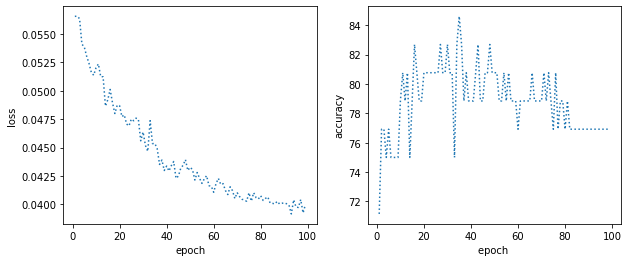

In [17]:
epoch_list,ls_list,accuracy_list=[],[],[]
for epoch in range(1, 100):
    train(model,trainloader, optimizer, epoch, criterion)
    ls,accuracy=test(model, testloader, criterion)
    epoch_list.append(epoch)
    ls_list.append(ls)
    accuracy_list.append(accuracy)

fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(epoch_list,ls_list,linestyle=':')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(122)
plt.plot(epoch_list,accuracy_list,linestyle=':')
plt.xlabel('epoch ')
plt.ylabel('accuracy')
plt.show()